# from tutorial

In [1]:
import xarray as xr
from pathlib import Path

In [2]:
data_2d_z2 =  '/scratch/nf33/Healpix_data/ICON/P1D_inst_z1_atm.zarr'
 #PT1H is hourly data
ds_2 = xr.open_zarr(data_2d_z2)
ds_2

<xarray.Dataset> Size: 21MB
Dimensions:       (crs: 1, time: 425, cell: 48, pressure: 30, pressure_rva: 3)
Coordinates:
  * crs           (crs) float32 4B nan
  * pressure      (pressure) int64 240B 5 10 20 50 ... 92500 95000 97500 100000
  * pressure_rva  (pressure_rva) int64 24B 16 18 23
  * time          (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Data variables: (12/23)
    egpvi         (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    einvi         (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    ekhvi         (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    ekvvi         (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    hur           (time, pressure, cell) float32 2MB dask.array<chunksize=(4, 1, 48), meta=np.ndarray>
    hus           (time, pressure, cell) float32 2MB dask.array<chunksize=(4, 1, 48), meta=np.ndarray>
    ...            ...
    ua            (time, pressure, cell) float32 2MB dask.array<chunksize=(4, 1, 48), meta=np.ndarray>
    uas           (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    va            (time, pressure, cell) float32 2MB dask.array<chunksize=(4, 1, 48), meta=np.ndarray>
    vas           (time, cell) float32 82kB dask.array<chunksize=(4, 48), meta=np.ndarray>
    wa            (time, pressure, cell) float32 2MB dask.array<chunksize=(4, 1, 48), meta=np.ndarray>
    zg            (time, pressure, cell) float32 2MB dask.array<chunksize=(4, 1, 48), meta=np.ndarray>
Attributes:
    hiopy::parent:  P1D_point_z2_atm

In [3]:
ds_2.pr

<xarray.DataArray 'pr' (time: 425, cell: 48)> Size: 82kB
dask.array<open_dataset-pr, shape=(425, 48), dtype=float32, chunksize=(4, 48), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Dimensions without coordinates: cell
Attributes:
    grid_mapping:        crs
    hiopy::time_method:  point
    hiopy::nnn:          4
    hiopy::enable:       True
    standard_name:       pr
    units:               kg m-2 s-1
    short_name:          
    long_name:           precipitation flux

In [4]:
ds_2.time

<xarray.DataArray 'time' (time: 425)> Size: 3kB
array(['2020-01-02T00:00:00.000000000', '2020-01-03T00:00:00.000000000',
       '2020-01-04T00:00:00.000000000', ..., '2021-02-27T00:00:00.000000000',
       '2021-02-28T00:00:00.000000000', '2021-03-01T00:00:00.000000000'],
      shape=(425,), dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-02 2020-01-03 ... 2021-03-01
Attributes:
    axis:     T

In [5]:
ds_2.pr.mean("cell").values[:40]

array([3.0770385e-05, 3.1824999e-05, 3.2356515e-05, 3.3262742e-05,
       3.1958087e-05, 3.2394812e-05, 3.2214117e-05, 3.2445048e-05,
       3.3817414e-05, 3.3942440e-05, 3.6819943e-05, 3.4115321e-05,
       3.1488227e-05, 3.2374151e-05, 3.2154818e-05, 2.9881381e-05,
       2.8548626e-05, 3.1357336e-05, 3.2812932e-05, 3.2292031e-05,
       3.3153858e-05, 3.3093267e-05, 3.2184722e-05, 3.2359952e-05,
       3.1241725e-05, 3.2756729e-05, 3.1290383e-05, 3.1808904e-05,
       3.4242006e-05, 3.4167206e-05, 3.2259992e-05, 3.1704778e-05,
       3.1273812e-05, 3.0475616e-05, 2.9527973e-05, 3.2515745e-05,
       3.1358260e-05, 3.1998974e-05, 3.2994034e-05, 3.1825159e-05],
      dtype=float32)

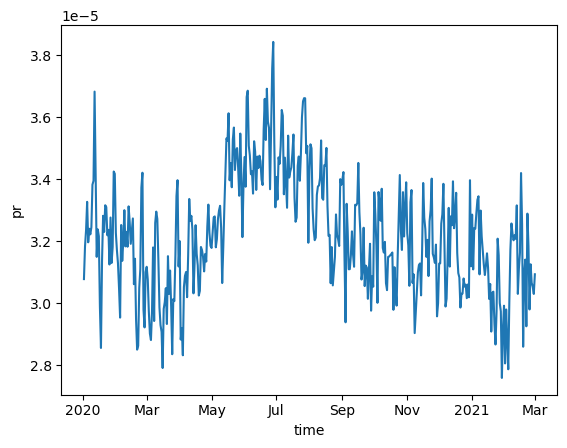

In [6]:
ds_2.pr.mean("cell").plot()

In [7]:
data_2d_z2 = "/scratch/nf33/Healpix_data/ICON/P1D_inst_z1_atm.zarr"
ds_2 = xr.open_zarr(data_2d_z2)

data_2d_z3 = "/scratch/nf33/Healpix_data/ICON/P1D_mean_z1_atm.zarr"
ds_3 = xr.open_zarr(data_2d_z3)

data_2d_z4 = "/scratch/nf33/Healpix_data/ICON/PT1H_inst_z1_atm.zarr"
ds_4 = xr.open_zarr(data_2d_z4)

data_2d_z5 = "/scratch/nf33/Healpix_data/ICON/PT3H_mean_z1_atm.zarr"
ds_5 = xr.open_zarr(data_2d_z5)

In [8]:
ds_dict = {2:ds_2.pr, 3:ds_3.pr, 4:ds_4.pr, 5:ds_5.pr}

In [9]:

import matplotlib.pyplot as plt
import easygems.healpix as egh
import cartopy.crs as ccrs

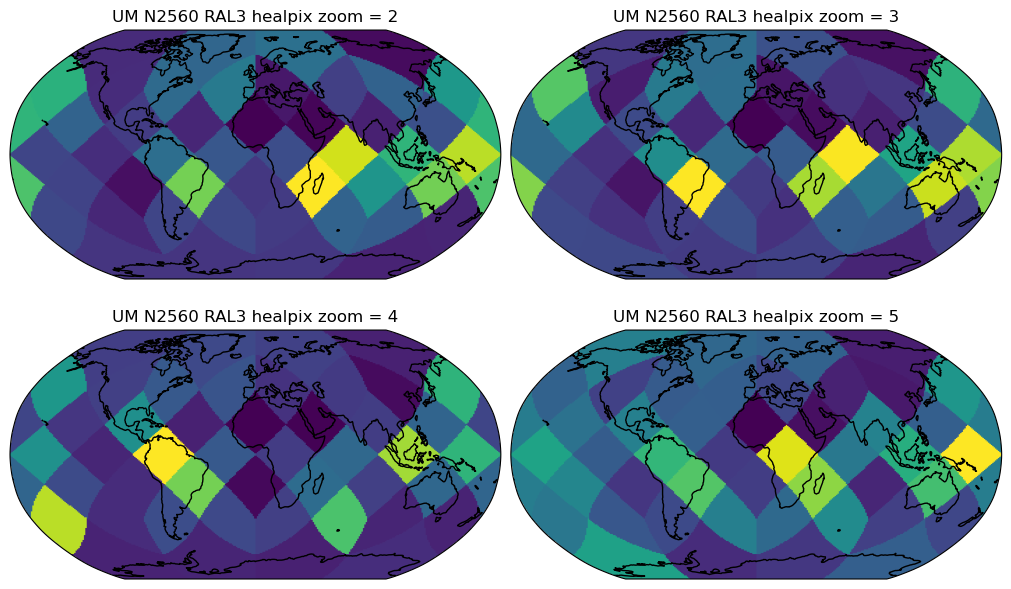

In [10]:
projection = ccrs.Robinson(central_longitude=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 6), subplot_kw={'projection': projection}, layout='constrained')

for ax, (name, da) in zip(axes.flatten(), ds_dict.items()):
    data = da.isel(time=20)
    ax.set_global()
    im = egh.healpix_show(data.values,ax=ax)
    ax.coastlines()
    ax.set_title(f'UM N2560 RAL3 healpix zoom = {name}')
    #print (ax, name, da)